In [419]:
import tensorflow as tf
import numpy as np

像素块随机打乱策略

In [420]:
def random_broken(inputs, radius):
    while len(inputs.shape) < 4:
        inputs = tf.expand_dims(inputs,axis=0)
    [batch_size, height, width, channels] = inputs.shape

    pool_size = [height//radius, width//radius]

    f1 = tf.split(inputs,num_or_size_splits=pool_size[0],axis=1)
    f2 = tf.split(np.array(f1),num_or_size_splits=pool_size[1],axis=3)
    temp = np.array(f2)
    
    temp = tf.reshape(np.array(f2),shape=[pool_size[1],pool_size[0],batch_size,radius*radius,channels])
    temp = tf.transpose(temp,[3,1,2,0,4])
    temp = tf.random.shuffle(temp)
    temp = tf.transpose(temp,[3,1,2,0,4])
    temp = tf.reshape(temp,shape=[pool_size[1],pool_size[0],batch_size,radius,radius,channels])
    
    cat = tf.split(temp,num_or_size_splits=pool_size[1],axis=0)
    cat = tf.concat(cat,axis=4)
    
    cat = tf.split(cat,num_or_size_splits=pool_size[0],axis=1)
    cat = tf.concat(cat,axis=3)

    out = tf.squeeze(cat)
    out = tf.expand_dims(out,axis=0)
    return out

In [421]:
import os

def imread(pth,name):
    ret = tf.io.read_file(os.path.join(pth,name))
    ret = tf.io.decode_png(ret)
    return ret

def imsave(img,name,pth):
    img = tf.io.encode_png(tf.squeeze(img))
    tf.io.write_file(os.path.join(pth,name),img)

In [422]:
from matplotlib import pyplot as plt
import numpy as np

def imshow(x, title=None, cbar=False, figsize=None):
    plt.figure(figsize=figsize)
    plt.imshow(np.squeeze(x), interpolation='nearest', cmap='gray')
    print(title)
    if title:
        plt.title(title)
    if cbar:
        plt.colorbar()
    plt.show()

None


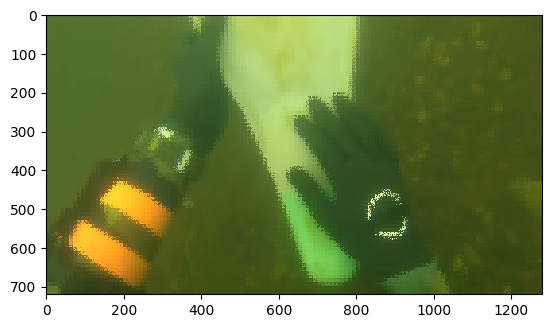

In [423]:
if __name__ == '__main__':
    image = imread("../../images","1.png")

    image = random_broken(image, radius=10)
    imshow(image)
    